# Projekt uczenienie maszynowe

Adrian Pilarczyk

Gabriela Rokosz

Piotr Namyślak

# Wstęp

W naszym projekcie wzieliśmy dane na temat osób, które miały styczność z rakiem piersi. Będziemy zmierzać do tego, aby móc przewidzieć na podstawie danych czy dany rak był złośliwy (M) czy łagodny (B).

Dane pochodzą z: Breast Cancer Wisconsin (Diagnostic) Data Set

Link: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

Na początku zajmiemy się EDA, czyli eksploracyjną analizą bazy danych. Przeprowadzimy odpowiednie czynności, które pokażą nam z jakimi danymi mamy do czynienia, pokażemy dane zmienne i ich statystyki itp. Następnie będziemy przewidywali za pomocą modeli nadzorowanymi i nienadzorowanymi, które osoby mogły mieć raka piersi. Na końcu porównamy modele oraz postaramy się wybrać najlepszy, końcowy model.

# Opis danych

1) ID number - Numer identyfikacyjny pacjenta

2) Diagnosis (M = malignant, B = benign) - Diagnoza (M = złośliwy, B = łagodny)

Dla każdego pacjenta oblicza się dziesięć cech:

a) radius - promień (średnia odległości od środka do punktów na obwodzie)

b) texture - tekstura (odchylenie standardowe wartości w skali szarości)

c) perimeter - obwód

d) area - obszar

e) smoothness - gładkość (lokalne zróżnicowanie długości promieni)

f) compactness - zwartość (obwód^2 / powierzchnia - 1,0)

g) concavity - wklęsłość (nasilenie wklęsłych części konturu)

h) concave points - punkty wklęsłe (liczba wklęsłych części konturu)

i) symmetry - symetria

j) fractal dimension - wymiar fraktalny („przybliżenie linii brzegowej” - 1)


# Wczytanie odpowiednich pakietów

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

# Wprowadzenie naszych danych

In [ ]:
breast = pd.read_csv("data.csv")
breast

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

# Zastosowanie EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

Spoglądamy, z jakimi danymi do czynienia:

In [ ]:
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Sprawdzamy, czy istnieją brakujące wartości w naszym zbiorze danych:

In [ ]:
breast.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Widzimy, że wszystkie kolumny oprócz ostatniej mają wszystkie wartości. Natomiast w ostatniej brakuje 569 wartości. Sprawdźmy dodatkowo rozmiar naszych danych:

In [ ]:
breast.shape

(569, 33)

Naszych obserwacji jest 569 oraz 33 kolumny. Zatem cała ostatnia kolumna zawiera tylko puste wartości. Nie nadaje się ona do analizy. Można wyrzucić kolumne 'Unnamed: 32' ze zbioru danych:

In [ ]:
breast.drop(['Unnamed: 32'], axis=1, inplace=True)

Spoglądając na nasze dane oraz ich opis, możemy kolumne 'id' wyrzucić z naszego zbioru również, gdyż pokazuje ona tylko id pacjenta, który był badany. Numer pacjenta nie może wpływać na jego wyniki:

In [ ]:
breast.drop(['id'], axis=1, inplace=True)

In [ ]:
breast.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

Następnie sprawdzamy podstatowe statystyki naszych danych takie jak ilość, średnia, odchylenie standardowe, min i max oraz kwantyle:

In [ ]:
breast.describe() #komenda ta sprawdza tylko dane liczbowe (bez Diagnosis)

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

Stworzymy funkcje, która pokaże nam rozkład naszych zmiennych na histogramie:

In [ ]:
def hist (df,var):
    wykres = px.histogram(df,x=var,color=var)
    wykres.show()

Pętla, która generuje histogramy dla każdej naszej zmiennej w bazie danych:

In [ ]:
for i in breast.columns:
    hist (breast,i)

Z uwagi na dużą ilość zmiennych i na widoczność danych na wykresach, wygenerujemy wykresy pairplot dla przykładowych 5 zmiennych, aby zobaczyć różnicę pomiędzy typem raka M i B (wykresy z uwzględnieniem zmiennej 'diagnosis'):

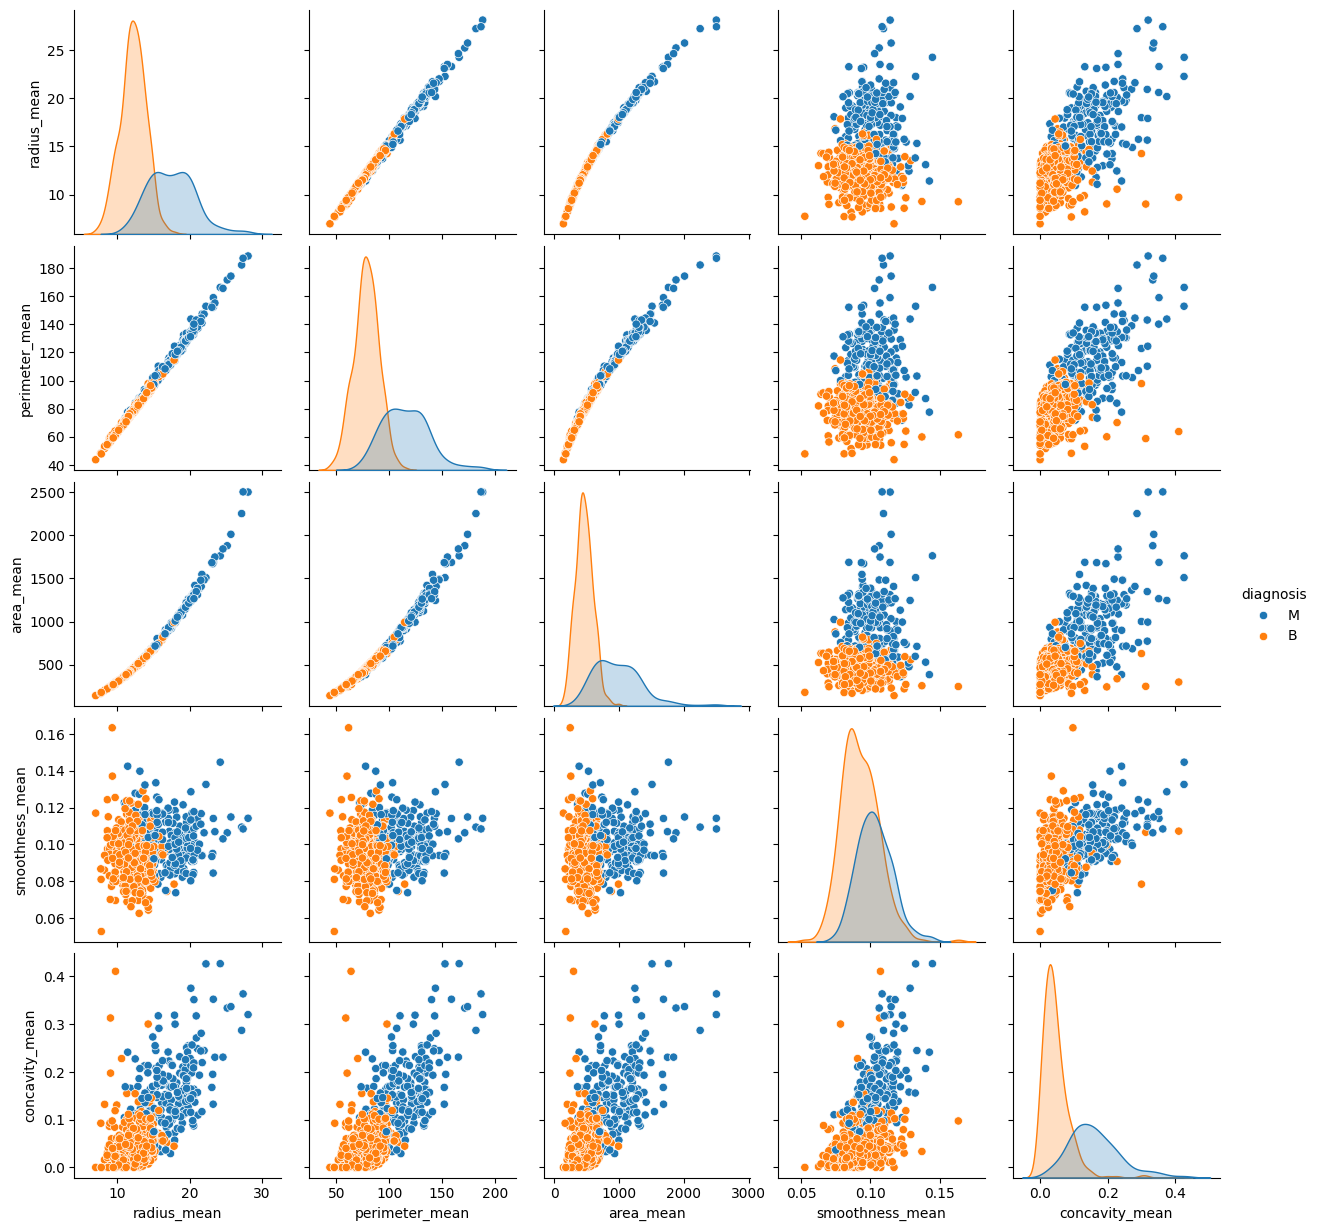

In [ ]:
sns.pairplot(breast, hue="diagnosis", vars = ["radius_mean", "perimeter_mean", "area_mean", "smoothness_mean", "concavity_mean",])

Zobaczmy teraz unikalne wartości dla każdej z naszych zmiennych w danych. Spoglądac na nasze dane poniżej oraz na histogramy powyżej:

In [ ]:
breast.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

Możemy stwierdzić, że wszystkie zmienne oprócz 'diagnosis' są liczbowe i każda z nich jest inna, więc byłoby ich bardzo dużo. Zamiast tego sprawdzimy ile było pacjentów z danym typem raka:

<Axes: xlabel='count', ylabel='diagnosis'>

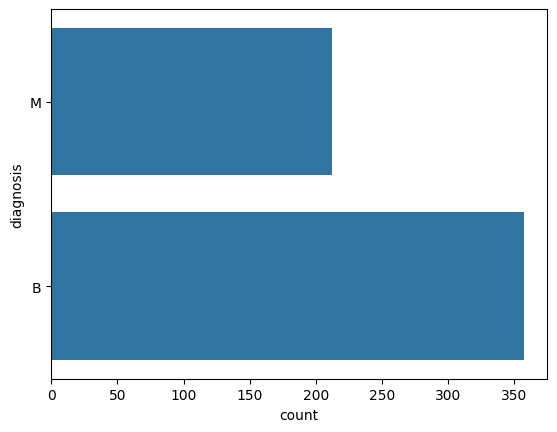

In [ ]:
sns.countplot(breast['diagnosis'])

# Budowanie modeli

Na początku podzielimy nasz zbiór danych na zmienne, które mają przewidywać jako X i 'diagnosis' jako Y. Następnie podzielimy je na zbiory treningowe i testowe:

In [ ]:
X = breast.drop(['diagnosis'], axis = 1)
y = breast['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state= 1311) #random_state nasz seed

# Modele nadzorowane

## Model Regresji Logistycznej

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Z racji tego, że nasza zmienna ma tylko 2 wartości, możemy śmiało zastosować jako pierwszy model regresji logistycznej, które przewidzi nam klasyfikacje typu raka:

In [ ]:
model_log = LogisticRegression()

Trenowanie modelu regresji logistycznej na naszych zestawach treningowych:

In [ ]:
model_log.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

Predykcja wartości na podstawie X treningowego w modelu regresji logistycznej:

In [ ]:
y_pred = model_log.predict(X_test)

Następnie przeprowadzamy macierz pomyłek na naszym modelu oraz badamy jego dokładność:

In [ ]:
conf = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", conf)

Confusion Matrix: 
 [[89  2]
 [ 5 47]]


In [ ]:
acc_log = accuracy_score(y_test, y_pred)*100
print ("Accuracy score: \n", acc_log)

Accuracy score: 
 95.1048951048951


Dodatkowo raport klasyfikacji modelu:

In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.98      0.96        91
           M       0.96      0.90      0.93        52

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



Aby wskazać najleszy model dla tego zbioru danych, przebadamy jeszcze inne 2 modele nadzorowane do klasyfikacji danych.

## Model K-Najbliższych Sąsiadów

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

https://medium.com/@agrawalsam1997/hyperparameter-tuning-of-knn-classifier-a32f31af25c7

Wykorzystamy algorytm z pętlą, aby znaleźć optymalny model dla naszych zbiorów danych z odpowiednią ilością sąsiadów. Tworzymy model:

In [ ]:
model_knn = KNeighborsClassifier()

Następnie ustawiamy parametry czyli ilość sąsiadów oraz typ wykonania algorytmu, aby znaleźć ten najbardziej optymalny dla modelu i wykonujemy pętle:

In [ ]:
train_score = {}
test_score = {}
n_neighbors = np.arange(2, 30, 1)
for neighbor in n_neighbors:
    model_knn = KNeighborsClassifier(n_neighbors=neighbor)
    model_knn.fit(X_train, y_train)
    train_score[neighbor]=model_knn.score(X_train, y_train)
    test_score[neighbor]=model_knn.score(X_test, y_test)

In [ ]:
for key, value in test_score.items():
    if value==max(test_score.values()):
        print(key)

7
13


Ostatecznie najlepszy wynik modelu dostaje dla liczby k=7. Zatem wykorzystajmy to do budowy naszego modelu:

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=7)

Dopasowanie modelu do naszych danych:

In [ ]:
model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

Predykcja wartości dla zbioru testowego:

In [ ]:
y_pred = model_knn.predict(X_test)

Macierz pomyłek dla modelu:

In [ ]:
conf = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", conf)

Confusion Matrix: 
 [[89  2]
 [ 6 46]]


Dokładność modelu:

In [ ]:
acc_knn = accuracy_score(y_test, y_pred)*100
print ("Accuracy score: \n", acc_knn)

Accuracy score: 
 94.4055944055944


Raport klasyfikacyjny modelu:

In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           B       0.94      0.98      0.96        91
           M       0.96      0.88      0.92        52

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143



## Model Naiwnego klasyfikatora Bayesowskiego

https://scikit-learn.org/0.15/modules/generated/sklearn.naive_bayes.GaussianNB.html

Tworzenie modelu:

In [ ]:
model_gaus = GaussianNB()

Dopasowanie danych do modelu:

In [ ]:
model_gaus.fit(X_train,y_train)

GaussianNB()

Predykcja wartości dla zbioru testowego:

In [ ]:
y_pred = model_gaus.predict(X_test)

Macierz pomyłek dla modelu:

In [ ]:
conf = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", conf)

Confusion Matrix: 
 [[87  4]
 [ 6 46]]


Dokładność modelu:

In [ ]:
acc_nb = accuracy_score(y_test, y_pred)*100
print ("Accuracy score: \n", acc_nb)

Accuracy score: 
 93.00699300699301


Raport klasyfikacyjny modelu:

In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           B       0.94      0.96      0.95        91
           M       0.92      0.88      0.90        52

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.92       143
weighted avg       0.93      0.93      0.93       143



# Porównanie dokładności modeli

Na koniec sprawdzimy, który model był najdokładniejszy dla naszych danych:

In [ ]:
all_models = pd.DataFrame({'Model': ['Logistic Regression', 'K - Nearest Neighbors', 'Naive Bayes',],'Score': [acc_log, acc_knn, acc_nb]})
all_models.sort_values(by='Score', ascending=False)

Model      Score
0    Logistic Regression  95.104895
1  K - Nearest Neighbors  94.405594
2            Naive Bayes  93.006993

# Modele nienadzorowane


#K-means
K-means to jedna z najpopularniejszych technik klastrowania w analizie danych. Jest to algorytm grupowania nienadzorowanego, który dzieli zbiór danych na klasyczne klastry na podstawie podobieństwa ich elementów. Modele nienadzorowane, takie jak K-means, działają bez wcześniejszych oznaczeń (etykiet) i wykrywają struktury w danych bez wiedzy na temat przynależności do klas.

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
X = breast[['area_mean', 'smoothness_mean']]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Realizuje metodę łokciową dla algorytmu K-means, analizując dane z dwóch kolumn: area_mean i smoothness_mean. Obliczamy sumę kwadratów odległości wewnątrz klastrów (WCSS) dla liczby klastrów od 1 do 10 i rysuje wykres WCSS w zależności od liczby klastrów.

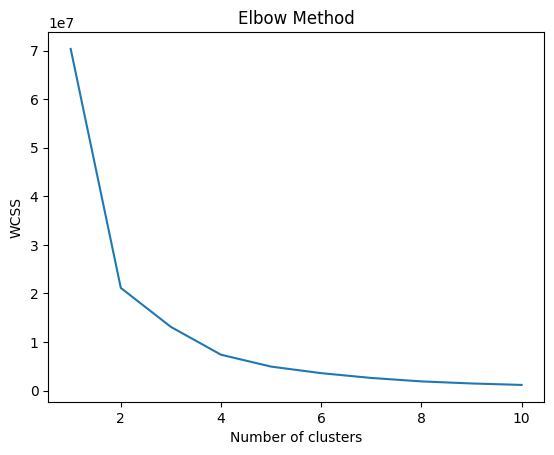

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Wykres pokazuje, że optymalna liczba klastrów to 2, co widać po punkcie, gdzie spadek WCSS przestaje być gwałtowny.

In [ ]:
optimal_n_clusters = 2
kmeans = KMeans(n_clusters=optimal_n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(X)

breast['cluster'] = clusters

Inicjujemy i trenujemy model K-means z optymalnie wybraną liczbą trzech klastrów na danych z ramki X, przewidujemy przynależność do klastrów dla tych danych, a następnie dodajemy wynikowe etykiety klastrów jako nową kolumnę cluster do ramki danych breast.

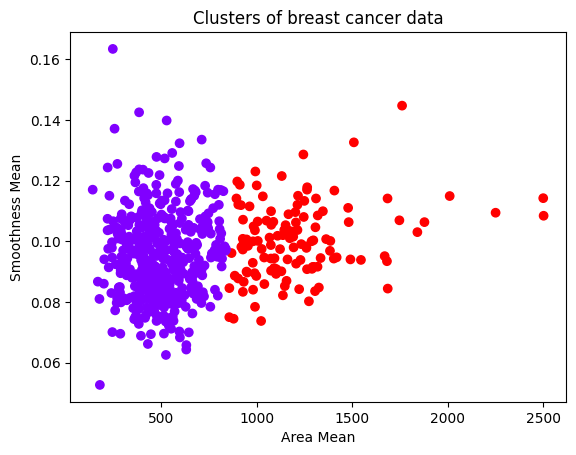

In [ ]:
plt.scatter(breast['area_mean'], breast['smoothness_mean'], c=breast['cluster'], cmap='rainbow')
plt.title('Clusters of breast cancer data')
plt.xlabel('Area Mean')
plt.ylabel('Smoothness Mean')
plt.show()

Wykres przedstawia klasteryzację danych o raku piersi na dwa klastry, zilustrowane różnymi kolorami (niebieski i czerwony), rozłożone względem średniej powierzchni (Area Mean) i średniej gładkości (Smoothness Mean). Klastery różnią się obydwoma cechami, co wskazuje na ich potencjalne znaczenie w różnicowaniu typów guzów.

#Wnioski
Użycie uczenia nienadzorowanego w analizie danych o raku piersi, takie jak algorytm K-means, umożliwia identyfikację naturalnych grup w danych bez konieczności wstępnego definiowania etykiet. To pozwala odkrywać ukryte wzorce i różnice, takie jak w średniej powierzchni i gładkości guzów, bez założeń o strukturze danych. Dzięki temu metoda ta jest szczególnie cenna w badaniach onkologicznych, umożliwiając lepsze zrozumienie choroby i rozwijanie efektywniejszych strategii leczenia.

#PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
X = breast.drop('diagnosis', axis=1)
y = breast['diagnosis']

Usunięcie kolumny 'diagnosis' przed wykonaniem PCA jest kluczowe, ponieważ:

Typ danych: 'diagnosis' jest kategorią (np. "M" dla złośliwych, "B" dla łagodnych), a PCA wymaga danych numerycznych.

Cel PCA: PCA ma na celu redukcję wymiarów i identyfikację wzorców w danych numerycznych, nie w etykietach.

Czystość analizy: Usunięcie etykiet umożliwia obiektywną analizę cech, bez wpływu na interpretację wyników przez informacje o diagnozie.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])

In [ ]:
final_df = pd.concat([principal_df, y], axis=1)

Dodanie kolumny 'diagnosis' do DataFrame z wynikami PCA pozwala:

Interpretować wyniki: Łączy zredukowane wymiary z oryginalnymi etykietami, umożliwiając ocenę, jak diagnozy są reprezentowane przez główne składowe.
Wizualizować efektywnie: Umożliwia kolorowanie punktów na wykresie PCA według diagnozy, co pomaga wizualnie ocenić separację między różnymi kategoriami.

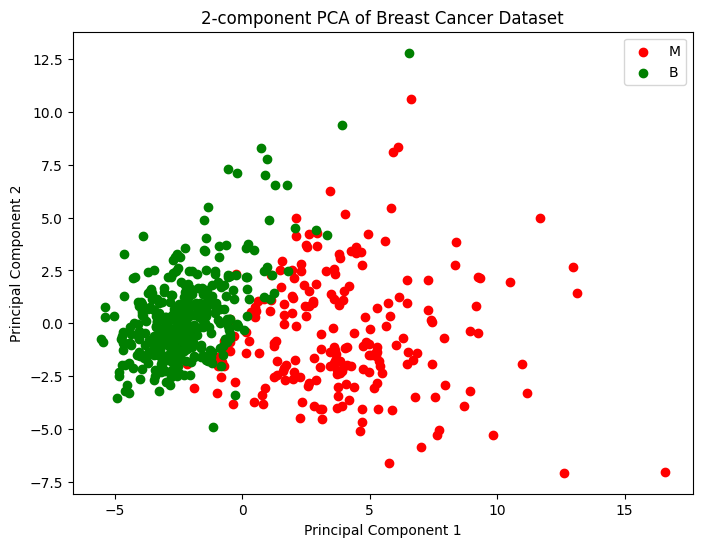

In [ ]:
plt.figure(figsize=(8,6))
for label, color in zip(['M', 'B'], ['r', 'g']):
    mask = final_df['diagnosis'] == label
    plt.scatter(final_df.loc[mask, 'principal component 1'], final_df.loc[mask, 'principal component 2'], c=color, label=label)
plt.title('2-component PCA of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

Wykres przedstawia dwuskładnikową analizę PCA zestawu danych o raku piersi, gdzie punkty są koloryzowane na czerwono dla złośliwych (M) i zielono dla łagodnych (B) przypadków. Główne składowe ułatwiają wizualizację rozróżnienia między typami guzów, z łagodnymi przypadkami skoncentrowanymi w lewej dolnej części wykresu, a złośliwymi w prawej górnej.

# Wnioski

Wykorzystanie PCA w analizie danych raka piersi z zastosowaniem uczenia nienadzorowanego skutecznie redukuje wymiarowość danych, umożliwiając wyodrębnienie kluczowych cech i lepszą wizualizację rozróżnienia między przypadkami złośliwymi a łagodnymi. Ta metoda ułatwia odkrywanie ukrytych wzorców i wspiera diagnostykę oraz badania nad rakiem piersi, nie wymagając wcześniejszego etykietowania danych.

# Podsumowanie projektu

Celem projektu była analiza danych dotyczących raka piersi w celu przewidywania, czy dany guz jest złośliwy (M) czy łagodny (B). Wykorzystaliśmy zarówno techniki uczenia nadzorowanego, jak i nienadzorowanego, aby zbadać struktury danych i ocenić efektywność różnych modeli predykcyjnych.

- Zastosowanie modeli nadzorowanych pozwoliło na skuteczne przewidywanie typów guzów na podstawie cech danych.
- Uczenie nienadzorowane umożliwiło identyfikację naturalnych grup i redukcję wymiarowości danych, co ułatwia wizualizację i interpretację.
- PCA pomogło w zrozumieniu struktury danych i wyróżnieniu kluczowych cech różnicujących typy guzów.

Uczenie maszynowe 2024